In [203]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from glob import glob
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage.filters import gaussian_filter1d
import pandas as pd

from matplotlib.font_manager import FontProperties
from scipy.interpolate import CubicSpline, BSpline

%run simulate_radiances_utils.py
%run locations.py


font = {'weight' : 'bold',
        'size'   : 12}
label_fontdict = {'weight' : 'bold',
        'size'   : 12}
title_fontdict = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [205]:
saved_results_path = '/net/fluo/data2/groupMembers/cchristo/results/rt_results/2011/'
saved_results_path_pre_co2 = '/net/fluo/data2/groupMembers/cchristo/results/rt_results_preindus_CO2/2011/'

In [206]:
# saved_results_path
result = [y for x in os.walk(saved_results_path) for y in glob(os.path.join(x[0], '*.nc'))]
result = sorted(result)

result_pre_co2 = [y for x in os.walk(saved_results_path_pre_co2) for y in glob(os.path.join(x[0], '*.nc'))]
result_pre_co2 = sorted(result_pre_co2)

In [148]:
result_pre_co2[-1]

'/net/fluo/data2/groupMembers/cchristo/results/rt_results_preindus_CO2/2011/12/surface_fields_20111231_2230.nc'

In [207]:
%%time
ds_all = xr.open_mfdataset(result, 
                           combine='by_coords')
ds_all.load()

CPU times: user 3min 52s, sys: 2min 8s, total: 6min
Wall time: 17min 31s


<xarray.Dataset>
Dimensions:        (nu: 170000, time: 2920)
Coordinates:
  * nu             (nu) float64 400.0 400.0 400.0 ... 2.1e+03 2.1e+03 2.1e+03
  * time           (time) datetime64[ns] 2011-01-01T01:30:00 ... 2011-12-31T22:30:00
Data variables:
    lw_down_CO2    (nu, time) float64 0.00051 0.0005091 ... 3.044e-07 3.078e-07
    lw_down_CH4    (nu, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lw_down_H2O    (nu, time) float64 0.09026 0.09063 ... 6.883e-07 7.323e-07
    lw_down_total  (nu, time) float64 0.09026 0.09063 ... 9.922e-07 1.039e-06
    eh_CO2         (nu, time) float64 nan nan nan nan nan ... nan nan nan nan
    eh_CH4         (nu, time) float64 nan nan nan nan nan ... nan nan nan nan
    eh_H2O         (nu, time) float64 191.4 178.4 179.1 195.4 ... nan nan nan
    dT_CO2         (nu, time) float64 nan nan nan nan nan ... nan nan nan nan
    dT_CH4         (nu, time) float64 nan nan nan nan nan ... nan nan nan nan
    dT_H2O         (nu, time) float64 0.07908 0.09735 0.08765 ... nan nan nan

In [149]:
ds_all_pre_co2 = xr.open_mfdataset(result_pre_co2, 
                           combine='by_coords')
ds_all_pre_co2.load()

<xarray.Dataset>
Dimensions:        (nu: 170000, time: 2920)
Coordinates:
  * nu             (nu) float64 400.0 400.0 400.0 ... 2.1e+03 2.1e+03 2.1e+03
  * time           (time) datetime64[ns] 2011-01-01T01:30:00 ... 2011-12-31T22:30:00
Data variables:
    lw_down_CO2    (nu, time) float64 0.0003618 0.0003612 ... 2.181e-07
    lw_down_CH4    (nu, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lw_down_H2O    (nu, time) float64 0.09026 0.09063 ... 6.883e-07 7.323e-07
    lw_down_total  (nu, time) float64 0.09026 0.09063 ... 9.036e-07 9.5e-07
    eh_CO2         (nu, time) float64 nan nan nan nan nan ... nan nan nan nan
    eh_CH4         (nu, time) float64 nan nan nan nan nan ... nan nan nan nan
    eh_H2O         (nu, time) float64 191.4 178.4 179.1 195.4 ... nan nan nan
    dT_CO2         (nu, time) float64 nan nan nan nan nan ... nan nan nan nan
    dT_CH4         (nu, time) float64 nan nan nan nan nan ... nan nan nan nan
    dT_H2O         (nu, time) float64 0.07908 0.09735 0.08765 ... nan nan nan

In [90]:
# ds_all.isel(time = -1)['lw_down_CO2'].plot()
# surf_diff_ds = ds_all - ds_all_pre_co2

(0.0, 30000.0)

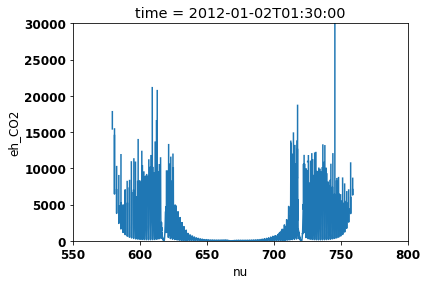

In [76]:
ds_all.isel(time = 8)['eh_CO2'].plot()
plt.xlim([550, 800])
plt.ylim([0, 30000])

(550.0, 800.0)

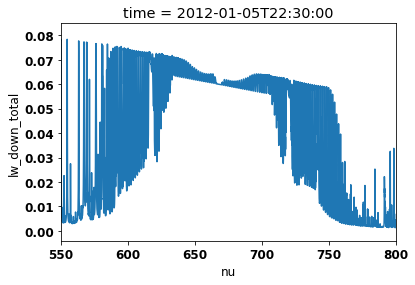

In [90]:
ds_all.isel(time = -1)['lw_down_total'].plot()
plt.xlim([550, 800])
# plt.ylim([0, 30000])

In [6]:
# ds_all_mean = xr.apply_ufunc(np.nanmean, ds_all, input_core_dims = [['time']], vectorize = True)
ds_all_mean = ds_all.mean(dim = 'time')

/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/numpy/lib/function_base.py:2198: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))


In [7]:
seasonal = ds_all.groupby('time.season').mean(dim = 'time', skipna = True)

/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [150]:
seasonal_pre_co2 = ds_all_pre_co2.groupby('time.season').mean(dim = 'time', skipna = True)

/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [242]:
seas_i = 1
surf_diff_summer = seasonal.isel(season = seas_i)['lw_down_total'] - \
    seasonal_pre_co2.isel(season = seas_i)['lw_down_total']
seas_i = 0
surf_diff_winter = seasonal.isel(season = seas_i)['lw_down_total'] - \
    seasonal_pre_co2.isel(season = seas_i)['lw_down_total']

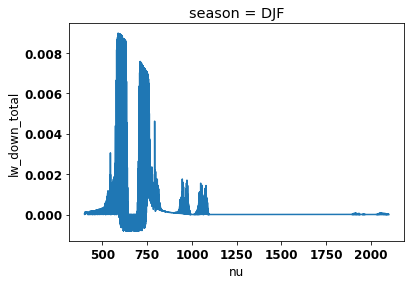

In [259]:

surf_diff_winter.plot()

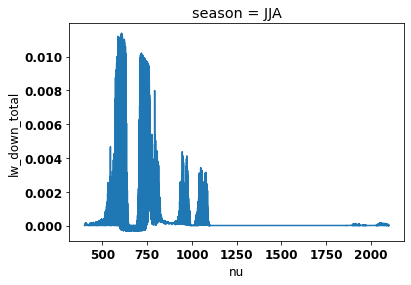

In [260]:
surf_diff_summer.plot()

0.48618106685500445


(550.0, 800.0)

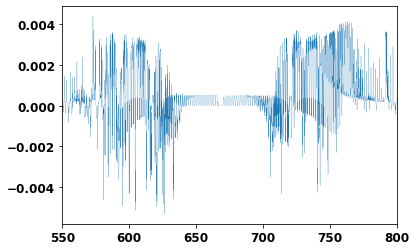

In [276]:
seasonal_diff_rf_spec = surf_diff_summer.values - surf_diff_winter.values
plt.plot(nu_,  
         seasonal_diff_rf_spec, 
         linewidth = 0.2)

print(compute_rf_from_diff_spec(seasonal_diff_rf_spec, nu = nu_))


plt.xlim([550, 800])

In [241]:
%run simulate_radiances_utils.py
# nu_ = surf_diff['nu'].values
# nu_inds = np.where((nu_ > 491.79016) & (nu_ < 1799.8556))
rad_sub, nu_sub = _filter_k_range_to_aeri(surf_diff.values, 
                                          surf_diff['nu'].values)
pos_rad_forcing = np.where(rad_sub > 0, rad_sub, 0)
neg_rad_forcing =   np.where(rad_sub < 0, rad_sub, 0)

print(compute_rf_from_diff_spec(rad_sub, nu = nu_sub))
print(compute_rf_from_diff_spec(pos_rad_forcing, nu = nu_sub))
print(compute_rf_from_diff_spec(neg_rad_forcing, nu = nu_sub))

1.7626967638449094
1.859123003848209
-0.09642624000329951


In [227]:
#summer
#2.2584232943452784
#2.2930580707240678
#-0.03463477637878946

array([3.89343088e-06, 3.51338326e-06, 3.06099518e-06, ...,
       1.42811110e-14, 1.70128668e-14, 0.00000000e+00])

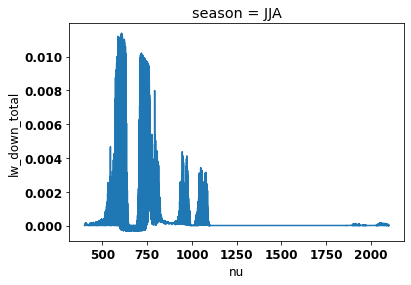

In [213]:
surf_diff.plot()
# plt.xlim([500,800])

In [177]:
%run simulate_radiances_utils.py
nu_ = surf_diff['nu'].values
nu_inds = np.where((nu_ > 491.79016) & (nu_ < 1799.8556))
compute_rf_from_diff_spec(surf_diff.values[nu_inds], nu = nu_[nu_inds])


1.7626967638449094

In [165]:
nu_ = surf_diff['nu'].values
nu_inds = np.where((nu_ > 491.79016) & (nu_ < 1799.8556))
compute_rf_from_diff_spec(surf_diff.values[nu_inds], nu = nu_[nu_inds])



2.2584232943452784

In [169]:
2.258423 - 1.76269

0.495733

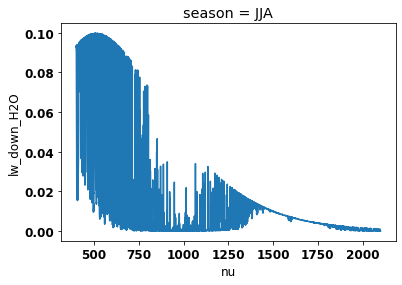

In [60]:
seasonal.isel(season = 1)['lw_down_H2O'].plot()

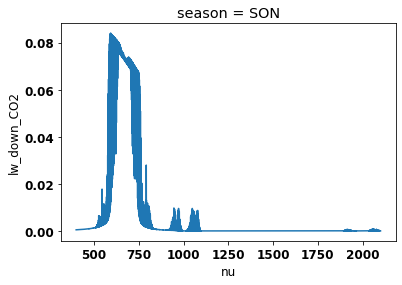

In [25]:
seasonal.isel(season = 3)['lw_down_CO2'].plot()

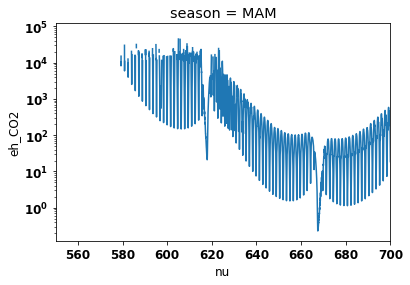

In [33]:
seasonal.isel(season = 2)['eh_CO2'].plot()
plt.xlim([550, 700])
plt.gca().set_yscale('log')
# plt.xlim([730, 740])
# plt.ylim([0, 1000])

In [64]:
# seasonal

(550.0, 700.0)

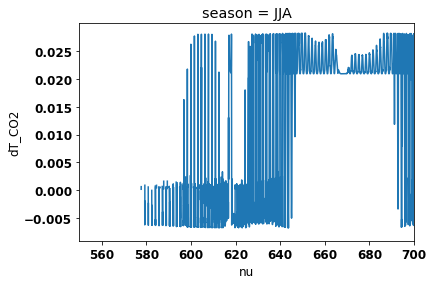

In [84]:
seasonal.isel(season = 1)['dT_CO2'].plot()
plt.xlim([550, 700])
# plt.gca().set_yscale('log')

In [187]:
# seas_i

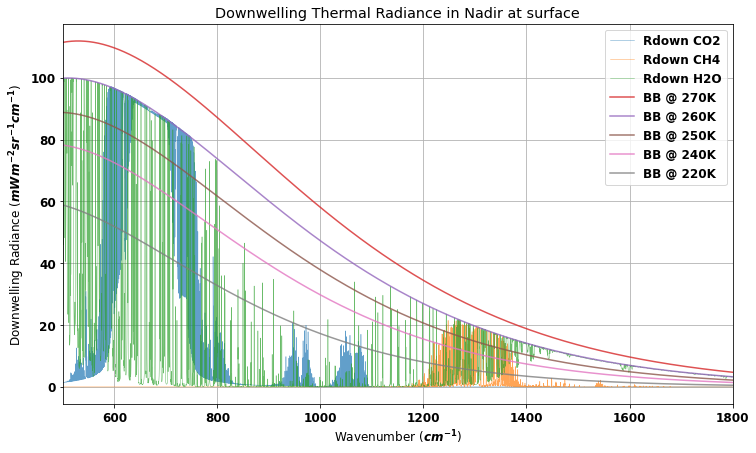

In [201]:
%run simulate_radiances_utils.py
seas_i = 1
R_down_CO2_seas_i = seasonal['lw_down_CO2'].isel(season = seas_i).values
R_down_CH4_seas_i  = seasonal['lw_down_CH4'].isel(season = seas_i).values
R_down_H2O_seas_i = seasonal['lw_down_H2O'].isel(season = seas_i).values
plot_downwelling_rad(R_down_CO2_seas_i,
                    R_down_CH4_seas_i,
                    R_down_H2O_seas_i,
                    nu = nu_)
# plt.xlim([790, 810])

In [199]:
%run simulate_radiances_utils.py

compute_mean_rad_800_band(seasonal['lw_down_total'].isel(season = seas_i).values,
                          nu = nu_)

0.008397717049206058

NameError: name 'W_m_mW_cm' is not defined